In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
from sklearn import preprocessing, model_selection



In [2]:
#loading the dataset in pandas dataframe
data = pd.read_csv("app_ML model_CocoPlantGrowth_Dataset.csv")

In [3]:
#check first five rows of the dataset
data.head()


,N,P,K,temperature,humidity,ph,rainfall,bug,productivity,growth
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Mealybug,Low,15
1,85,58,41,NaN,80.319644,NaN,226.655537,No,Medium,81
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Mites,Low,15
3,74,35,40,26.491096,NaN,6.980401,242.864034,Mites,Low,15
4,78,42,42,NaN,81.604873,7.628473,262.717340,Both,Medium,15


In [4]:
#check Last five rows of the dataset
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,bug,productivity,growth
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,No,Low,75
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Both,Low,8
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Mealybug,Low,16
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Mealybug,Medium,20
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Mealybug,High,24


In [5]:
data.loc[data["bug"] == 'No', "bug"] = 0
data.loc[data["bug"] == 'Mites', "bug"] = 1
data.loc[data["bug"] == 'Mealybug', "bug"] = 2
data.loc[data["bug"] == 'Both', "bug"] = 3
data.head()

,N,P,K,temperature,humidity,ph,rainfall,bug,productivity,growth
0,90,42,43,20.879744,82.002744,6.502985,202.935536,2,Low,15
1,85,58,41,NaN,80.319644,NaN,226.655537,0,Medium,81
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,Low,15
3,74,35,40,26.491096,NaN,6.980401,242.864034,1,Low,15
4,78,42,42,NaN,81.604873,7.628473,262.717340,3,Medium,15


In [6]:
data.loc[data["productivity"] == 'High', "productivity"] = 1
data.loc[data["productivity"] == 'Medium', "productivity"] = 2
data.loc[data["productivity"] == 'Low', "productivity"] = 0
data.head()

,N,P,K,temperature,humidity,ph,rainfall,bug,productivity,growth
0,90,42,43,20.879744,82.002744,6.502985,202.935536,2,0,15
1,85,58,41,NaN,80.319644,NaN,226.655537,0,2,81
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,0,15
3,74,35,40,26.491096,NaN,6.980401,242.864034,1,0,15
4,78,42,42,NaN,81.604873,7.628473,262.717340,3,2,15


In [7]:
#check mathamtic realtionship of the dataset
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,growth
count,2200.000000,2200.000000,2200.000000,2196.000000,2197.000000,2199.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.622312,71.467265,6.469221,103.463655,32.432273
std,36.917334,32.985883,50.647931,5.065966,22.275482,0.774019,54.958389,27.275963
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.770662,60.242186,5.971573,64.551686,14.000000
50%,37.000000,51.000000,32.000000,25.605637,80.471527,6.424671,94.867624,20.000000
75%,84.250000,68.000000,49.000000,28.563593,89.984052,6.922752,124.267508,69.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,94.000000


In [8]:
#check corr realtionship of the dataset
data.corr()

,N,P,K,temperature,humidity,ph,rainfall,bug,productivity,growth
N,1.000000,-0.231460,-0.140512,0.027493,0.190310,0.096402,0.059020,-0.023437,0.024259,0.063246
P,-0.231460,1.000000,0.736232,-0.127686,-0.118679,-0.138083,-0.063839,0.025211,-0.039957,0.078061
K,-0.140512,0.736232,1.000000,-0.160654,0.191017,-0.169477,-0.053461,0.016064,0.000699,0.100951
temperature,0.027493,-0.127686,-0.160654,1.000000,0.206206,-0.016764,-0.027342,0.027759,-0.001429,-0.052989
humidity,0.190310,-0.118679,0.191017,0.206206,1.000000,-0.008580,0.093170,0.010024,0.058561,0.031016
ph,0.096402,-0.138083,-0.169477,-0.016764,-0.008580,1.000000,-0.109958,-0.002518,-0.025642,-0.026613
rainfall,0.059020,-0.063839,-0.053461,-0.027342,0.093170,-0.109958,1.000000,-0.002336,0.029740,0.021448
bug,-0.023437,0.025211,0.016064,0.027759,0.010024,-0.002518,-0.002336,1.000000,-0.021645,-0.802454
productivity,0.024259,-0.039957,0.000699,-0.001429,0.058561,-0.025642,0.029740,-0.021645,1.000000,0.095522
growth,0.063246,0.078061,0.100951,-0.052989,0.031016,-0.026613,0.021448,-0.802454,0.095522,1.000000


In [9]:
#check missing value of the dataset
data.isnull().sum()


N               0
P               0
K               0
temperature     4
humidity        3
ph              1
rainfall        0
bug             0
productivity    0
growth          0
dtype: int64

In [10]:
data.describe()


,N,P,K,temperature,humidity,ph,rainfall,growth
count,2200.000000,2200.000000,2200.000000,2196.000000,2197.000000,2199.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.622312,71.467265,6.469221,103.463655,32.432273
std,36.917334,32.985883,50.647931,5.065966,22.275482,0.774019,54.958389,27.275963
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.770662,60.242186,5.971573,64.551686,14.000000
50%,37.000000,51.000000,32.000000,25.605637,80.471527,6.424671,94.867624,20.000000
75%,84.250000,68.000000,49.000000,28.563593,89.984052,6.922752,124.267508,69.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,94.000000


In [11]:
#check corr realtionship of the dataset
data.corr()

,N,P,K,temperature,humidity,ph,rainfall,bug,productivity,growth
N,1.000000,-0.231460,-0.140512,0.027493,0.190310,0.096402,0.059020,-0.023437,0.024259,0.063246
P,-0.231460,1.000000,0.736232,-0.127686,-0.118679,-0.138083,-0.063839,0.025211,-0.039957,0.078061
K,-0.140512,0.736232,1.000000,-0.160654,0.191017,-0.169477,-0.053461,0.016064,0.000699,0.100951
temperature,0.027493,-0.127686,-0.160654,1.000000,0.206206,-0.016764,-0.027342,0.027759,-0.001429,-0.052989
humidity,0.190310,-0.118679,0.191017,0.206206,1.000000,-0.008580,0.093170,0.010024,0.058561,0.031016
ph,0.096402,-0.138083,-0.169477,-0.016764,-0.008580,1.000000,-0.109958,-0.002518,-0.025642,-0.026613
rainfall,0.059020,-0.063839,-0.053461,-0.027342,0.093170,-0.109958,1.000000,-0.002336,0.029740,0.021448
bug,-0.023437,0.025211,0.016064,0.027759,0.010024,-0.002518,-0.002336,1.000000,-0.021645,-0.802454
productivity,0.024259,-0.039957,0.000699,-0.001429,0.058561,-0.025642,0.029740,-0.021645,1.000000,0.095522
growth,0.063246,0.078061,0.100951,-0.052989,0.031016,-0.026613,0.021448,-0.802454,0.095522,1.000000


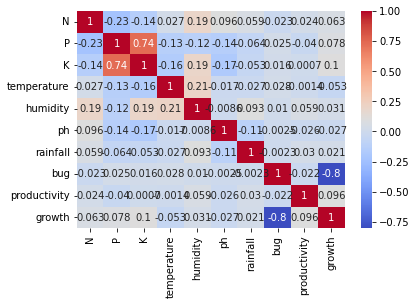

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the correlation matrix plot (heatmap)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


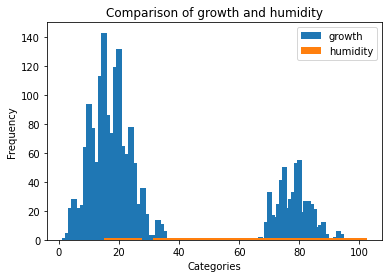

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'bugs' and 'PH' columns

# Count the frequency of each bug type
bug_counts = data['growth'].value_counts()

# Count the frequency of each PH value
ph_counts = data['humidity'].value_counts()

# Set the width of each bar
bar_width = 1.70

# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the bug counts as a bar plot
ax.bar(bug_counts.index, bug_counts.values, bar_width, label='growth')

# Plot the PH counts as a bar plot, offsetting the x-coordinates
ax.bar(ph_counts.index + bar_width, ph_counts.values, bar_width, label='humidity')

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of growth and humidity')
ax.legend()

In [14]:
#check first five rows of the dataset
data.head(20)


,N,P,K,temperature,humidity,ph,rainfall,bug,productivity,growth
0,90,42,43,20.879744,82.002744,6.502985,202.935536,2,0,15
1,85,58,41,NaN,80.319644,NaN,226.655537,0,2,81
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,0,15
3,74,35,40,26.491096,NaN,6.980401,242.864034,1,0,15
4,78,42,42,NaN,81.604873,7.628473,262.717340,3,2,15
5,69,37,42,23.058049,83.370118,7.073454,251.055000,1,1,25
6,69,55,38,22.708838,NaN,5.700806,271.324860,3,2,16
7,94,53,40,20.277744,82.894086,5.718627,241.974195,1,2,21
8,89,54,38,24.515881,NaN,6.685346,230.446236,0,0,76
9,68,58,38,NaN,83.033227,6.336254,221.209196,3,2,15


In [15]:
from sklearn.impute import SimpleImputer

# Assuming you have your data stored in a pandas DataFrame called 'data'

# Step 1: Identify columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()]

# Step 2: Calculate the mean of each column
imputer = SimpleImputer(strategy='mean')
imputer.fit(data[columns_with_missing_values])

# Step 3: Replace missing values with the mean
data[columns_with_missing_values] = imputer.transform(data[columns_with_missing_values])

In [16]:
#check first five rows of the dataset
data.head(20)

,N,P,K,temperature,humidity,ph,rainfall,bug,productivity,growth
0,90,42,43,20.879744,82.002744,6.502985,202.935536,2,0,15
1,85,58,41,25.622312,80.319644,6.469221,226.655537,0,2,81
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,0,15
3,74,35,40,26.491096,71.467265,6.980401,242.864034,1,0,15
4,78,42,42,25.622312,81.604873,7.628473,262.717340,3,2,15
5,69,37,42,23.058049,83.370118,7.073454,251.055000,1,1,25
6,69,55,38,22.708838,71.467265,5.700806,271.324860,3,2,16
7,94,53,40,20.277744,82.894086,5.718627,241.974195,1,2,21
8,89,54,38,24.515881,71.467265,6.685346,230.446236,0,0,76
9,68,58,38,25.622312,83.033227,6.336254,221.209196,3,2,15


In [17]:
x_axis = np.array(data.drop(['growth', 'humidity'], axis=1))
y_axis = np.array(data['growth'], dtype ='float')
y_axis.shape = (len(y_axis),1)

In [18]:
x_trainset ,x_testset , y_trainset, y_testset = model_selection.train_test_split(x_axis,y_axis, test_size = 0.3)
#Splits data into 70:30 ratio
#70% for training , 30% for testing

In [19]:
x_train_scaled = preprocessing.scale(x_trainset)
y_train_scaled = y_trainset
x_test_scaled = preprocessing.scale(x_testset)
y_test_scaled = y_testset

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features
degree = 2 # Set the degree of the polynomial   
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(x_train_scaled)
X_test_poly = poly_features.transform(x_test_scaled)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly , y_train_scaled)
# Predict on the test set
y_pred = model.predict(X_test_poly)
# Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print(y_pred)

Mean Squared Error: 55.28528417179185
R-squared Score: 0.924479041175071
[[ 1.61466766e+01]
 [ 3.43927925e+01]
 [ 7.96820286e+00]
 [ 3.51910897e+01]
 [ 1.62845836e+01]
 [ 3.74321550e+01]
 [ 3.56743714e+01]
 [ 1.21790923e+01]
 [ 2.64452203e+01]
 [ 1.29045278e+01]
 [ 7.46395226e+01]
 [ 7.87747488e+01]
 [ 1.07580495e+01]
 [ 2.69404134e+01]
 [ 3.05524985e+01]
 [ 1.11025841e+01]
 [ 8.07253949e+01]
 [ 2.70054321e+01]
 [ 8.08477157e+01]
 [ 1.24982256e+01]
 [ 3.14748591e+01]
 [ 9.08014272e+00]
 [ 6.00455426e+00]
 [ 7.56111443e+01]
 [ 4.09652980e+01]
 [ 7.54544067e+01]
 [ 9.27399402e+00]
 [ 7.72527165e+01]
 [ 4.50540029e+00]
 [ 1.72018914e+01]
 [ 7.86526600e+01]
 [ 3.68692214e+01]
 [ 7.61003657e+01]
 [ 7.63777243e+01]
 [ 9.35872976e+00]
 [ 3.88196894e+00]
 [ 2.77154857e+01]
 [ 1.71267827e+00]
 [ 6.70502694e+01]
 [ 7.02019962e+00]
 [ 5.59838939e+00]
 [ 7.12019523e+01]
 [ 1.17236244e+01]
 [ 2.70941322e+01]
 [ 8.00104360e+01]
 [ 2.06325299e+01]
 [ 1.40970641e+01]
 [ 5.98808188e+00]
 [ 8.14016912e+

In [21]:
print("Actual Growth\t\tPredicted Growth")
for x, y in zip(y_test_scaled, y_pred):
    print(f"{x}\t\t\t{y}")


Actual Growth		Predicted Growth
[26.]			[16.14667664]
[25.]			[34.39279247]
[6.]			[7.96820286]
[24.]			[35.19108972]
[14.]			[16.28458356]
[27.]			[37.43215496]
[26.]			[35.67437143]
[21.]			[12.17909234]
[16.]			[26.44522031]
[21.]			[12.90452785]
[76.]			[74.63952256]
[79.]			[78.7747488]
[18.]			[10.7580495]
[15.]			[26.94041338]
[20.]			[30.55249846]
[20.]			[11.10258412]
[84.]			[80.72539491]
[34.]			[27.00543215]
[82.]			[80.84771572]
[22.]			[12.49822561]
[19.]			[31.47485913]
[20.]			[9.08014272]
[14.]			[6.00455426]
[78.]			[75.61114434]
[30.]			[40.96529804]
[77.]			[75.45440674]
[6.]			[9.27399402]
[79.]			[77.25271645]
[15.]			[4.50540029]
[25.]			[17.2018914]
[80.]			[78.65265998]
[27.]			[36.86922138]
[78.]			[76.1003657]
[77.]			[76.37772425]
[15.]			[9.35872976]
[13.]			[3.88196894]
[15.]			[27.71548568]
[11.]			[1.71267827]
[69.]			[67.05026943]
[6.]			[7.02019962]
[15.]			[5.59838939]
[73.]			[71.20195226]
[20.]			[11.72362443]
[15.]			[27.0941322]
[82.]			[80.010435

[23.]			[12.60922633]
[19.]			[11.35273621]
[15.]			[5.60895902]
[12.]			[4.7089651]
[29.]			[32.5322311]
[19.]			[12.22855061]
[14.]			[13.90398569]
[20.]			[22.25436658]
[23.]			[34.51859098]
[6.]			[7.51687858]
[23.]			[25.63403533]
[72.]			[72.30139566]
[75.]			[74.70349595]
[17.]			[28.93225499]
[14.]			[26.75369476]
[15.]			[17.18858301]
[74.]			[73.63360314]
[19.]			[8.91261245]
[79.]			[76.4257807]
[80.]			[76.71374857]
[82.]			[80.39660147]
[21.]			[10.97425076]
[15.]			[28.52877106]
[6.]			[7.33599445]
[71.]			[68.63017735]
[79.]			[79.24183772]
[6.]			[10.17599851]
[24.]			[15.60395848]
[80.]			[78.65253031]
[75.]			[73.31603781]
[71.]			[70.73092754]
[5.]			[9.25269504]
[80.]			[78.13781016]
[20.]			[30.29125247]
[20.]			[9.61832386]
[17.]			[25.12623183]
[13.]			[5.46900038]
[14.]			[18.23247875]
[76.]			[74.92962108]
[16.]			[27.46154083]
[26.]			[15.03321045]
[82.]			[80.41708583]
[9.]			[14.62662298]
[79.]			[79.16186612]
[9.]			[11.73805793]
[78.]			[76.69801792]
[19.]

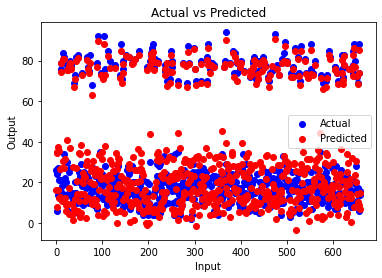

In [22]:
import matplotlib.pyplot as plt

# Create a scatter plot of input-output pairs
plt.scatter(range(len(y_test_scaled)), y_test_scaled,color='blue', label='Actual')
plt.scatter(range(len(y_test_scaled)), y_pred, color='red', label='Predicted')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [23]:
import pickle

# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [24]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    x_te = preprocessing.scale(df, axis=1)
    print(x_te)
    
    X_test_po = poly_features.transform(x_te)
    
    y_pred = model.predict(X_test_po)
    
    return y_pred


config = {
    "N": [0],
    "P": [0],
    "K": [0],
    "temperature" :[24],
    "ph":[4],
    "rainfall" :[0],
    "bug" :[0],
    "productivity":[2]
}


ff=predict_mpg(config, model)
print(ff)

[[-0.48236748 -0.48236748 -0.48236748  2.6047844   0.03215783 -0.48236748
  -0.48236748 -0.22510482]]
[[30.64152475]]
